**Your Task**

Your challenge involves working with the “Global Terrorism Database” from the National Consortium for the Study of Terrorism and Responses to Terrorism (START). This dataset is a rich source of information on terrorist activities worldwide.

**Dataset Link**: Global Terrorism Database

**Imporant rule for this Daily Challenge**
**1. Download the Dataset:** Begin by downloading the dataset needed for this challenge.

**2. Avoid Uploading the Dataset to GitHub:**

* The dataset is large and can cause problems if you try to push it to your GitHub repository.
* To prevent this, you must add it to a .gitignore file.

**3. Set Up Your** .gitignore:

* Watch the video below for guidance on how to add the dataset path to your .gitignore file.
* This ensures the dataset will not be included in your GitHub uploads.

**4. Begin the Challenge:** Once the above steps are completed, you can start working on the daily challenge.

**1. Data Cleaning:**
* **Initial Assessment:**  Load the dataset and conduct a preliminary assessment to understand its structure and content.
* **Handling Inconsistencies:** Identify and address missing values, incorrect data types, and data inconsistencies.


**2. Data Transformation:**
* **Categorical Transformation:** Convert categorical data into a format suitable for analysis, such as one-hot encoding.
* **Numerical Normalization:** Normalize or standardize numerical features as required.


**3. Exploratory Data Analysis:**
* **Data Exploration:** Conduct exploratory data analysis on the cleaned and integrated dataset.
* **Visualization:** Create visualizations to reveal patterns and insights related to terrorism events in their socio-economic context.


**1. DATA CLEANING**

In [1]:
from google.colab import files
uploaded = files.upload()

Saving globalterrorismdb_0718dist.csv to globalterrorismdb_0718dist.csv


In [18]:
import pandas as pd

In [3]:
df = pd.read_csv("globalterrorismdb_0718dist.csv", encoding='ISO-8859-1', low_memory=False)
df

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,201712310022,2017,12,31,NaN,0,NaN,182,Somalia,11,...,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN
181687,201712310029,2017,12,31,NaN,0,NaN,200,Syria,10,...,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1,NaN
181688,201712310030,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Maguindanao clashes trap tribe members,"" Phil...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
181689,201712310031,2017,12,31,NaN,0,NaN,92,India,6,...,NaN,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [5]:
df.isnull().sum().sort_values(ascending=False)

,0
gsubname3,181671
weapsubtype4,181621
weapsubtype4_txt,181621
weaptype4_txt,181618
weaptype4,181618
...,...
dbsource,0
INT_LOG,0
INT_IDEO,0
INT_MISC,0


**Handling columns with more than 90% Missing Values**

Some columns have over 99% missing data (e.g., gsubname3, weapsubtype4_txt).

These are most likely sparsely populated optional fields.

I will be dropping any column with >90% missing values since they are not very useful for most analysis.

In [14]:
# Drop columns with >90% missing values
threshold = 0.9 * len(df)
df_cleaned = df.dropna(thresh=threshold, axis=1)

# Fill commonly missing important fields
if 'summary' in df_cleaned.columns:
    df_cleaned['summary'] = df_cleaned['summary'].fillna('Unknown')

if 'nkill' in df_cleaned.columns:
    df_cleaned['nkill'] = df_cleaned['nkill'].fillna(0)

if 'nwound' in df_cleaned.columns:
    df_cleaned['nwound'] = df_cleaned['nwound'].fillna(0)

# Fill missing categorical/text columns with 'Unknown'
categorical_cols = ['targsubtype1', 'targsubtype1_txt', 'natlty1_txt', 'natlty1', 'target1', 'city', 'provstate']
for col in categorical_cols:
    if col in df_cleaned.columns:
        df_cleaned[col] = df_cleaned[col].fillna('Unknown')

# Fill missing numerical/indicator columns
numerical_cols = ['longitude', 'latitude', 'guncertain1', 'ishostkid', 'specificity', 'multiple', 'doubtterr']
for col in numerical_cols:
    if col in df_cleaned.columns:
        if col in ['guncertain1', 'ishostkid', 'multiple', 'doubtterr']:
            df_cleaned[col] = df_cleaned[col].fillna(0)
        elif col in ['longitude', 'latitude']:
            df_cleaned[col] = df_cleaned[col].fillna(-999)
        elif col == 'specificity':
            df_cleaned[col] = df_cleaned[col].fillna(1)

# Final check to confirm no missing values remain
df_cleaned.isnull().sum().sum()

/tmp/ipython-input-3586260606.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['nkill'] = df_cleaned['nkill'].fillna(0)
/tmp/ipython-input-3586260606.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['nwound'] = df_cleaned['nwound'].fillna(0)
/tmp/ipython-input-3586260606.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.p

np.int64(0)

In [15]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 45 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   eventid           181691 non-null  int64  
 1   iyear             181691 non-null  int64  
 2   imonth            181691 non-null  int64  
 3   iday              181691 non-null  int64  
 4   extended          181691 non-null  int64  
 5   country           181691 non-null  int64  
 6   country_txt       181691 non-null  object 
 7   region            181691 non-null  int64  
 8   region_txt        181691 non-null  object 
 9   provstate         181691 non-null  object 
 10  city              181691 non-null  object 
 11  latitude          181691 non-null  float64
 12  longitude         181691 non-null  float64
 13  specificity       181691 non-null  float64
 14  vicinity          181691 non-null  int64  
 15  crit1             181691 non-null  int64  
 16  crit2             18

In [16]:
# Columns with special codes (like -9)
special_flag_cols = ['doubtter', 'guncertain1', 'ishostkid']

for col in special_flag_cols:
    if col in df_cleaned.columns:
        # Replace -9 with NA to mark as unknown
        df_cleaned[col] = df_cleaned[col].replace(-9, pd.NA)
        # Convert to category for safe handling
        df_cleaned[col] = df_cleaned[col].astype('category')

# safe binary columns (already cleaned) cast to int
binary_cols = ['multiple', 'specificity']
for col in binary_cols:
    if col in df_cleaned.columns:
      df_cleaned[col] = df_cleaned[col].astype(int)

# Convert object columns that are really categories
categorical_object_cols = [
    'country_txt', 'region_txt', 'provstate', 'city',
    'attacktype1_txt', 'targtype1_txt', 'targsubtype1_txt',
    'target1', 'natlty1_txt', 'gname', 'weaptype1_txt', 'dbsource'
]
for col in categorical_object_cols:
    if col in df_cleaned.columns:
        df_cleaned[col] = df_cleaned[col].astype('category')

# confirm changes
df_cleaned.info()

/tmp/ipython-input-155644491.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[col] = df_cleaned[col].replace(-9, pd.NA)
/tmp/ipython-input-155644491.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[col] = df_cleaned[col].astype('category')
/tmp/ipython-input-155644491.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 45 columns):
 #   Column            Non-Null Count   Dtype   
---  ------            --------------   -----   
 0   eventid           181691 non-null  int64   
 1   iyear             181691 non-null  int64   
 2   imonth            181691 non-null  int64   
 3   iday              181691 non-null  int64   
 4   extended          181691 non-null  int64   
 5   country           181691 non-null  int64   
 6   country_txt       181691 non-null  category
 7   region            181691 non-null  int64   
 8   region_txt        181691 non-null  category
 9   provstate         181691 non-null  category
 10  city              181691 non-null  category
 11  latitude          181691 non-null  float64 
 12  longitude         181691 non-null  float64 
 13  specificity       181691 non-null  int64   
 14  vicinity          181691 non-null  int64   
 15  crit1             181691 non-null  int64   
 16  cr

/tmp/ipython-input-155644491.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[col] = df_cleaned[col].astype('category')
/tmp/ipython-input-155644491.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[col] = df_cleaned[col].astype('category')
/tmp/ipython-input-155644491.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyda

**2. DATA TRANSFORMATION**

In [17]:
from sklearn.preprocessing import MinMaxScaler

#One-Hot Encode selected categorical features
categorical_cols_to_encode = [
    'region_txt', 'country_txt', 'attacktype1_txt', 'targtype1_txt', 'weaptype1_txt'
    ]
df_transformed = pd.get_dummies(df_cleaned, columns=categorical_cols_to_encode, drop_first=True)

# Normalize kill and woundcounts
numerical_cols_to_scale = ['nkill', 'nwound']
scaler = MinMaxScaler()
df_transformed[numerical_cols_to_scale] = scaler.fit_transform(df_transformed[numerical_cols_to_scale])

**3. EXPLORATORY DATA ANALYSIS**

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

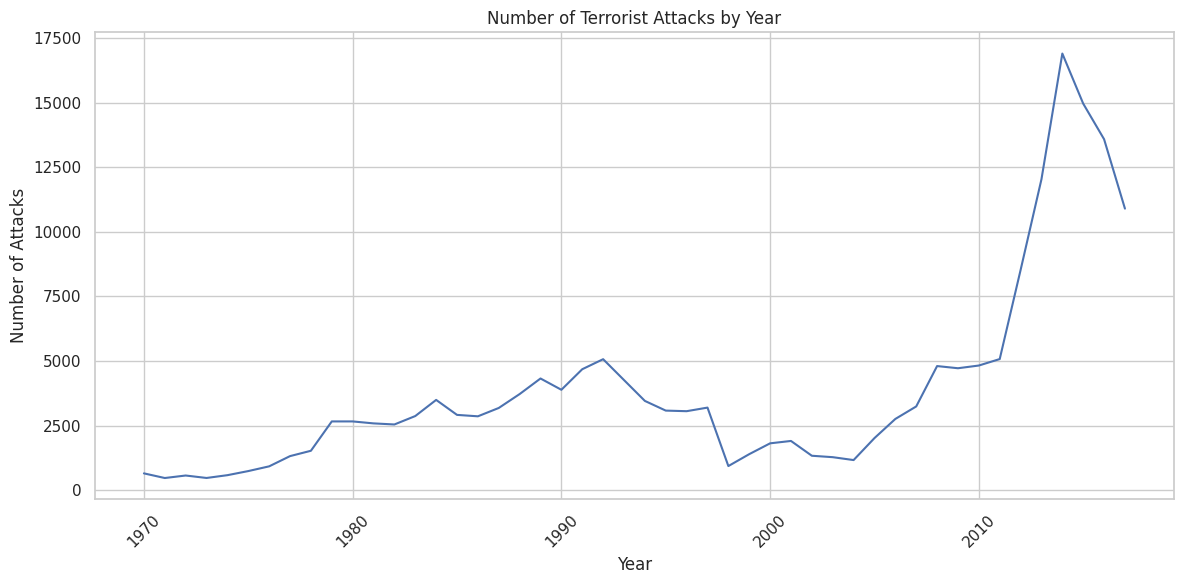

In [22]:
# Attacks by year
attacks_by_year = df_cleaned['iyear'].value_counts().sort_index()
plt.figure()
sns.lineplot(x=attacks_by_year.index, y=attacks_by_year.values)
plt.title("Number of Terrorist Attacks by Year")
plt.xlabel("Year")
plt.ylabel("Number of Attacks")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

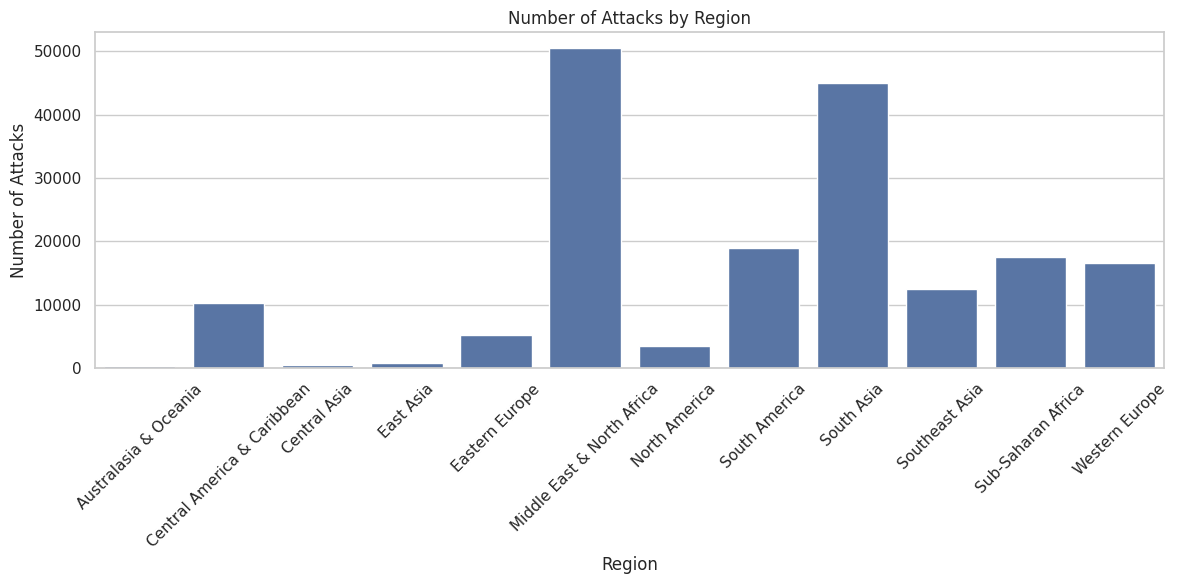

In [23]:
# Attacks by region
attacks_by_region = df_cleaned['region_txt'].value_counts()
plt.figure()
sns.barplot(x=attacks_by_region.index, y=attacks_by_region.values)
plt.title("Number of Attacks by Region")
plt.xlabel("Region")
plt.ylabel("Number of Attacks")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

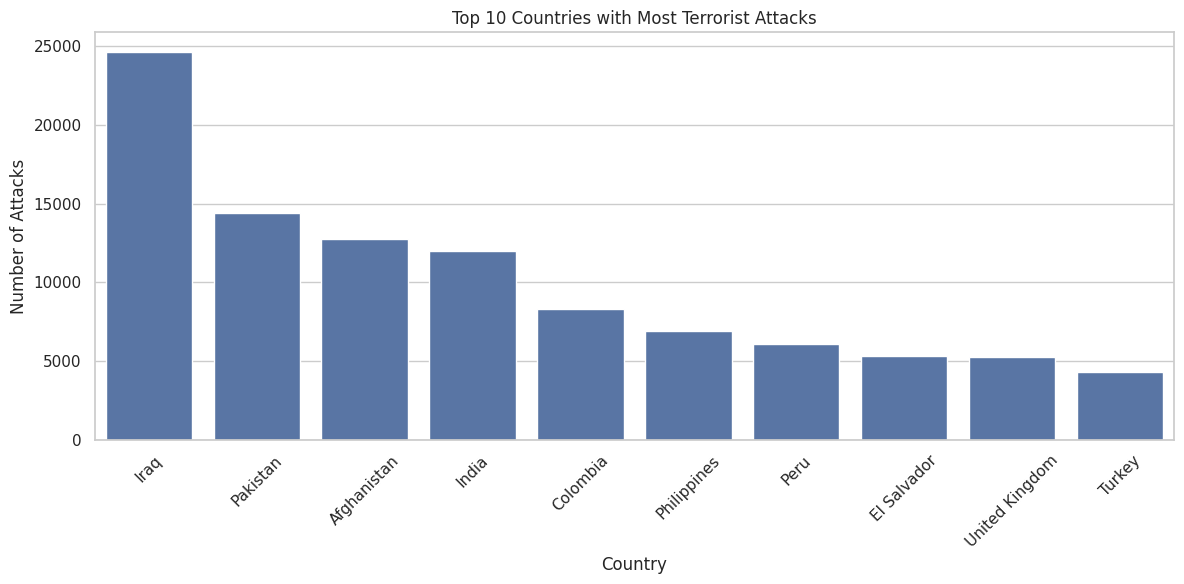

In [34]:
# Top 10 countries
attacks_by_country = df['country_txt'].value_counts().head(10)
plt.figure()
sns.barplot(x=attacks_by_country.index, y=attacks_by_country.values)
plt.title("Top 10 Countries with Most Terrorist Attacks")
plt.xlabel("Country")
plt.ylabel("Number of Attacks")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

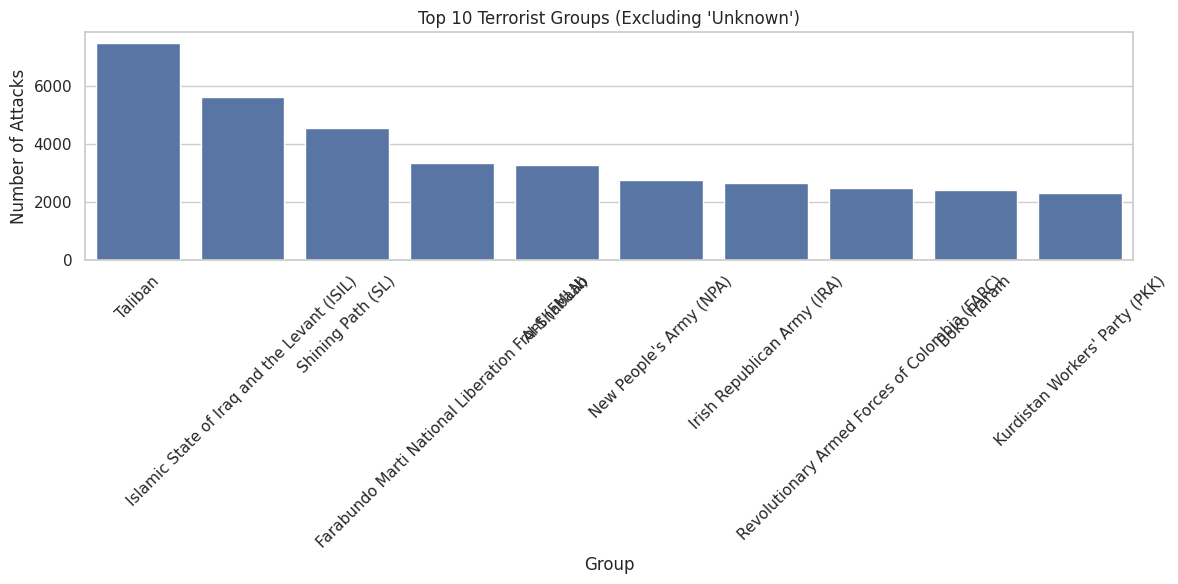

In [36]:
# Top 10 groups (excluding "Unknown")
attacks_by_group = df[df['gname'] != 'Unknown']['gname'].value_counts().head(10)
plt.figure()
sns.barplot(x=attacks_by_group.index, y=attacks_by_group.values)
plt.title("Top 10 Terrorist Groups (Excluding 'Unknown')")
plt.xlabel("Group")
plt.ylabel("Number of Attacks")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

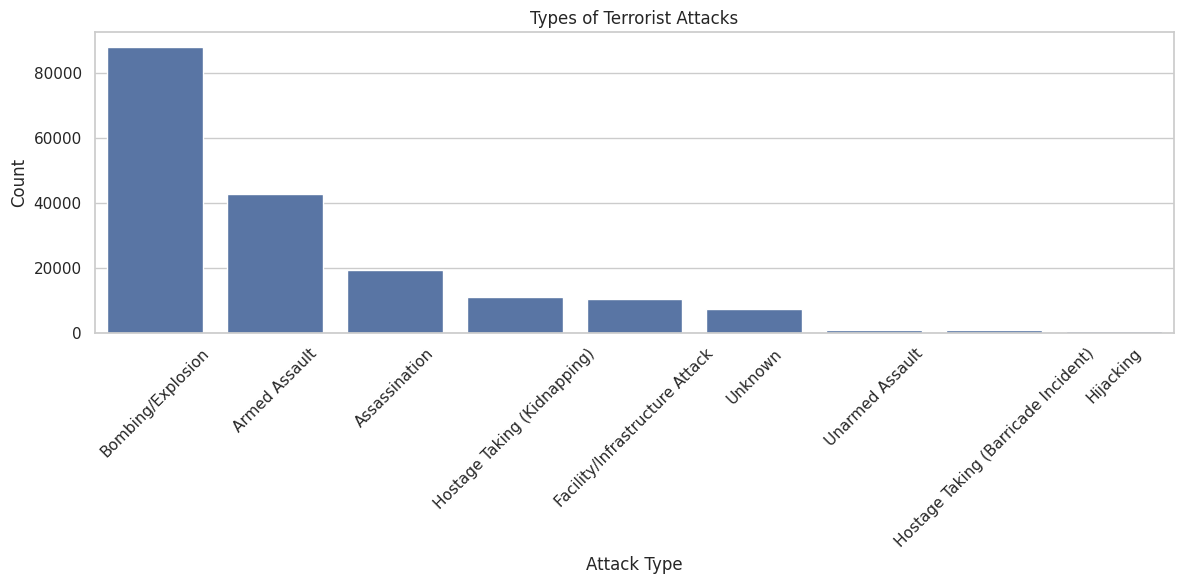

In [40]:
# Attack types
attack_types = df['attacktype1_txt'].value_counts()
plt.figure()
sns.barplot(x=attack_types.index, y=attack_types.values)
plt.title("Types of Terrorist Attacks")
plt.xlabel("Attack Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()